In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from sympy import *
init_printing()

## Marginal and Conditional Densities ##

In [2]:
# VIDEO
from IPython.display import YouTubeVideo

YouTubeVideo('K4NlpU_Kd_0')

Let random variables $X$ and $Y$ have the joint density defined by

$$
f(x, y) ~ = ~ 
\begin{cases}
30(y-x)^4, ~~~ 0 < x < y < 1 \\
0 ~~~~~~~~ \text{otherwise}
\end{cases}
$$

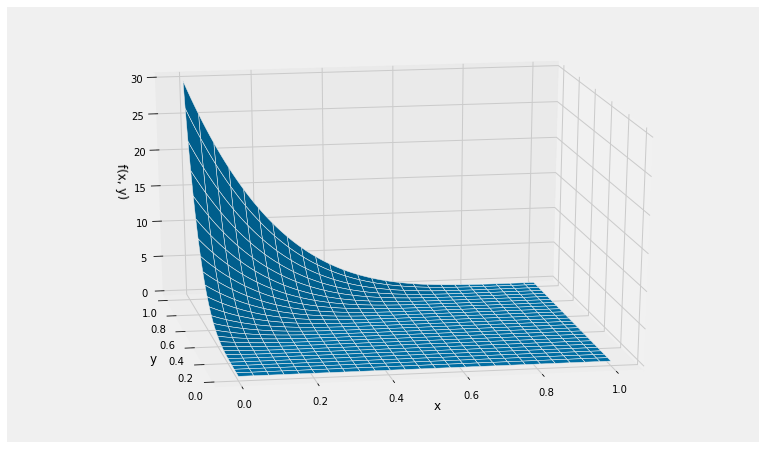

In [3]:
def jt_dens(x,y):
    if y < x:
        return 0
    else:
        return 30 * (y-x)**4

Plot_3d(x_limits=(0,1), y_limits=(0,1), f=jt_dens, cstride=4, rstride=4)

Then the possible values of $(X, Y)$ are in the upper right hand triangle of the unit square.

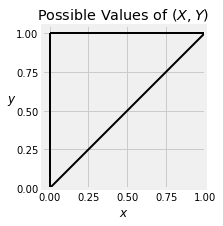

In [4]:
# NO CODE

plt.figure(figsize=(3,3))
plt.axes().set_aspect('equal')
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('Possible Values of $(X, Y)$');

Here is a quick check by `SymPy` to see that the function $f$ is indeed a joint density.

In [5]:
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

joint_density = 30*(y-x)**4

In [6]:
Integral(joint_density, (y, x, 1), (x, 0, 1)).doit()

### Marginal Density of $X$ ###
We can use the joint density $f$ to find the density of $X$. Call this density $f_X$. We know that

$$
\begin{align*}
f_X(x)dx &\sim P(X \in dx) \\
&= \int_y P(X \in dx, Y \in dy) \\
&= \int_y f(x, y)dxdy \\
&= \big{(} \int_y f(x, y)dy \big{)}dx
\end{align*}
$$

You can see the reasoning behind this calculation in the graph below. The blue strip shows the event $\{ X \in dx \}$ for a value of $x$ very near 0.25. To find the volume $P(X \in dx)$, we hold $x$ fixed and add over all $y$. 

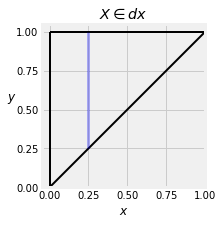

In [7]:
# NO CODE

plt.figure(figsize=(3,3))
plt.axes().set_aspect('equal')
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
plt.plot([0.25, 0.25], [0.25, 1], color='blue', lw=3, alpha=0.3)
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('$X \in dx$');

So the density of $X$ is given by

$$
f_X(x) ~ = ~ \int_y f(x, y)dy ~~~~~ \text{for all } x
$$

By analogy with the discrete case, $f_X$ is sometimes called the *marginal density* of $X$. 

In our example, the possible values of $(X, Y)$ are the upper left hand triangle as shown above. So for each fixed $x$, the possible values of $Y$ go from $x$ to 1. 

Therefore for $0 < x < 1$, the density of $X$ is given by

$$
\begin{align*} 
f_X(x) &= \int_x^1 30(y-x)^4 dy \\
&= 30 \cdot \frac{1}{5} (y-x)^5 \Big{\rvert}_x^1 \\
&= 6(1-x)^5
\end{align*}
$$

Here is the joint density surface again. You can see that $X$ is much more likely to be near 0 than near 1. 

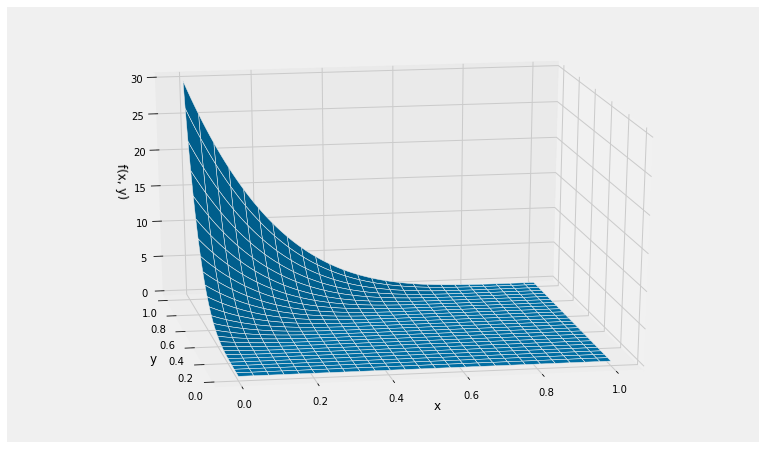

In [8]:
Plot_3d(x_limits=(0,1), y_limits=(0,1), f=jt_dens, cstride=4, rstride=4)

That can be seen in the shape of the density of $X$.

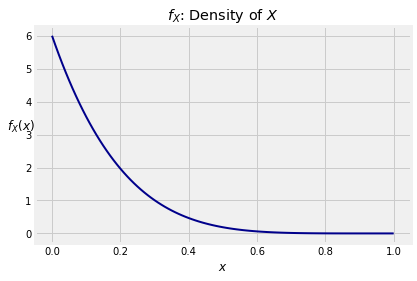

In [9]:
# NO CODE
x_vals = np.arange(0, 1.01, 0.01)
f_X = 6*(1-x_vals)**5
plt.plot(x_vals, f_X, color='darkblue', lw=2)
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$', rotation=0)
plt.title('$f_X$: Density of $X$');

### Density of $Y$ ###
Correspondingly, the density of $Y$ can be found by fixing $y$ and integrating over $x$ as follows:

$$
f_Y(y) = \int_x f(x, y)dx ~~~~ \text{for all } y
$$

In our example, the joint density surface indicates that $Y$ is more likely to be near 1 than near 0, which is confirmed by calculation. Remember that $y > x$ and therefore for each fixed $y$, the possible values of $x$ are 0 through $y$. 

For $0 < y < 1$,

$$
f_Y(y) ~ = ~ \int_0^y 30(y-x)^4dx ~ = ~ 6y^5
$$

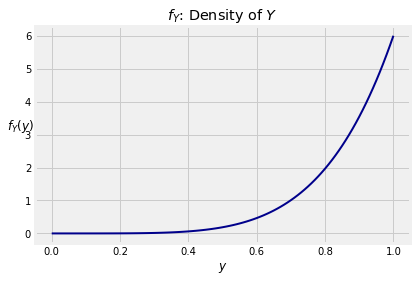

In [10]:
# NO CODE
y_vals = np.arange(0, 1.01, 0.01)
f_Y = 6*y_vals**5
plt.plot(y_vals, f_Y, color='darkblue', lw=2)
plt.xlabel('$y$')
plt.ylabel('$f_Y(y)$', rotation=0)
plt.title('$f_Y$: Density of $Y$');

In [11]:
# VIDEO
YouTubeVideo('T0CkUU6V6CE')

### Conditional Densities ###
Consider the conditional probability $P(Y \in dy \mid X \in dx)$. By the division rule, 

$$
P(Y \in dy \mid X \in dx) ~ = ~ 
\frac{P(X \in dx, Y \in dy)}{P(X \in dx)} ~ = ~ 
\frac{f(x, y)dxdy}{f_X(x)dx} ~ = ~
\frac{f(x, y)}{f_X(x)} dy
$$

This gives us a division rule for densities. For a fixed value $x$, the *conditional density of $Y$ given $X=x$* is defined by 

$$
f_{Y\mid X=x} (y) ~ = ~ \frac{f(x, y)}{f_X(x)} ~~~~ \text{for all } y
$$

Since $X$ has a density, we know that $P(X = x) = 0$ for all $x$. But the ratio above is of densities, not probabilities. It might help your intuition to think of "given $X=x$" to mean "given that $X$ is just around $x$".

Visually, the shape of this conditional density is the vertical cross section at $x$ of the joint density graph above. The numerator determines the shape, and the denominator is part of the constant that makes the density integrate to 1. 

Note that $x$ is constant in this formula; it is the given value of $X$. So the denominator $f_X(x)$ is the same for all the possible values of $y$. 

To see that the conditional density does integrate to 1, let's do the integral.

$$
\int_y f_{Y\mid X=x} (y)dy ~ = ~ \int_y \frac{f(x, y)}{f_X(x)} dy ~ = ~
\frac{1}{f_X(x)} \int_y f(x, y)dy ~ = ~ \frac{1}{f_X(x)} f_X(x) ~ = ~ 1
$$

In our example, let $x = 0.4$ and consider finding the conditional density of $Y$ given $X = 0.4$. Under that condition, the possible values of $Y$ are in the range 0.4 to 1, and therefore

$$
f_{Y \mid X=0.4} (y) = \frac{30(y - 0.4)^4}{6(1 - 0.4)^5} = 
\frac{5}{0.6^5} (y - 0.4)^4  \;\;\;   y \in (0.4, 1)
$$

This is a density on $(0.4, 1)$:

In [12]:
y = Symbol('y', positive=True)

conditional_density_Y_given_X_is_04 = (5/(0.6**5)) * (y - 0.4)**4

Integral(conditional_density_Y_given_X_is_04, (y, 0.4, 1)).doit()

The figure below shows the overlaid graphs of the density of $Y$ and the conditional density of $Y$ given $X = 0.4$. You can see that the conditional density is more concentrated on large values of $Y$, because under the condition $X = 0.4$ you know that $Y$ can't be small.

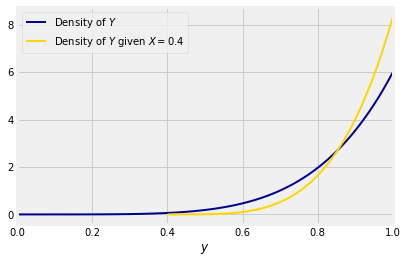

In [13]:
# NO CODE
plt.plot(y_vals, f_Y, color='darkblue', lw=2, label='Density of $Y$')
new_y = np.arange(0.4, 1.01, 0.01)
dens = (5/(0.6**5)) * (new_y - 0.4)**4
plt.plot(new_y, dens, color='gold', lw=2, label='Density of $Y$ given $X=0.4$')
plt.legend()
plt.xlim(0, 1)
plt.xlabel('$y$');

### Using a Conditional Density ###
We can use conditional densities to find probabilities and expectations, just as we would use an ordinary density. Here are some examples of calculations. In each case we will set up the integrals and then use `SymPy`.

$$
P(Y > 0.9 \mid X = 0.4) = \int_{0.9}^1 \frac{5}{0.6^5} (y - 0.4)^4 dy
$$

The answer is about 60%. 

In [14]:
Integral(conditional_density_Y_given_X_is_04, (y, 0.9, 1)).doit()

Now we will use the conditional density to find a conditional expectation. Remember that in our example, given that $X = 0.4$ the possible values of $Y$ go from $0.4$ to 1.

$$
E(Y \mid X = 0.4) ~ = ~ \int_{0.4}^1 y \frac{5}{0.6^5} (y - 0.4)^4 dy ~ = ~ 0.9
$$

In [15]:
Integral(y*conditional_density_Y_given_X_is_04, (y, 0.4, 1)).doit()

You can condition $X$ on $Y$ in the same way. By analogous arguments, for any fixed value of $y$ the conditional density of $X$ given $Y = y$ is

$$
f_{X \mid Y=y} (x) = \frac{f(x, y)}{f_Y(y)} \;\;\; \text{for all } x
$$

All the examples in this section and the previous one have started with a joint density function that apparently emerged out of nowhere. In the next section, we will study a context in which they arise.